![](https://mivia.unisa.it/onfire2023/assets/img/iciap_logo.jpg)
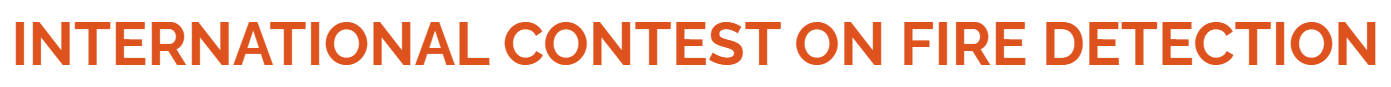

Dear Participant,

Thanks for your participation to ONFIRE Contest 2023.

Please download the following files:
- Training videos: https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing
- Training annotations: https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing
- Code example: https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing

Please remind that:
- The deadline for the submission of the methods is 21st July, 2023. The submission must be done with an email in which the participants share (directly or with external links) the trained model, the code and the report. The participants can receive the training set and its annotations by sending an email to onfire2023@unisa.it, in which they also communicate the name of the team.
- The participants can use these training samples and annotations, but also additional videos.
- The participants must submit their trained model and their code by carefully following the detailed instructions reported in the website.
- The participants are strongly encouraged to submit a contest paper to ICIAP 2023, whose deadline is 28th July, 2023. The contest paper must be also sent by email to the organizers. Otherwise, the participants must produce a brief PDF report of the proposed method.
- The detailed instructions of the proposed method can be downloaded here: https://mivia.unisa.it/onfire2023/

In [ ]:
# You can follow this tutorial for more information - https://www.tutorialspoint.com/google_colab/index.htm
# You can also see this video - https://www.youtube.com/watch?v=inN8seMm7UI

# Mount your Drive - After doing this step, your Google Drive folders are accessible from Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')   # COMMENTO DI PROVA

Mounted at /content/gdrive


#Download and unzip

Rendimao il link scaricabile e (nel secondo box di codice) scarichiamo i video

In [ ]:
import gdown
def download_google_file(shader_url, output_name):
  id_url = "https://drive.google.com/uc?id=" + shader_url.split("/")[5]
  gdown.download(id_url, output_name)

In [ ]:
download_google_file("https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing", "VIDEOS.zip")
!unzip VIDEOS.zip

Downloading...
From: https://drive.google.com/uc?id=1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF
To: /content/VIDEOS.zip
100%|██████████| 1.52G/1.52G [00:20<00:00, 75.6MB/s]


Archive:  VIDEOS.zip
   creating: TRAINING_SET/
   creating: TRAINING_SET/1/
  inflating: TRAINING_SET/1/Video75_2.mp4  
  inflating: TRAINING_SET/1/Video210.mp4  
  inflating: TRAINING_SET/1/Video150.mp4  
  inflating: TRAINING_SET/1/Video60.mp4  
  inflating: TRAINING_SET/1/Video186.mp4  
  inflating: TRAINING_SET/1/Video75_1.mp4  
  inflating: TRAINING_SET/1/Video75_3.mp4  
  inflating: TRAINING_SET/1/Video72.mp4  
  inflating: TRAINING_SET/1/Video71.mp4  
  inflating: TRAINING_SET/1/Video130.mp4  
  inflating: TRAINING_SET/1/Video109.mp4  
  inflating: TRAINING_SET/1/Video115.mp4  
  inflating: TRAINING_SET/1/Video103.mp4  
  inflating: TRAINING_SET/1/Video18.mp4  
  inflating: TRAINING_SET/1/Video138.mp4  
  inflating: TRAINING_SET/1/Video213.mp4  
  inflating: TRAINING_SET/1/Video80.mp4  
  inflating: TRAINING_SET/1/Video83.mp4  
  inflating: TRAINING_SET/1/Video43.mp4  
  inflating: TRAINING_SET/1/Video170.mp4  
  inflating: TRAINING_SET/1/Video47.mp4  
  inflating: TRAINING_SET

Riorganizza i file in modo da dividere video e annotazioni e chiamare le classi nel modo consueto, cioè 0 e 1

In [ ]:
download_google_file("https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing", "GT.zip")
!unzip GT.zip
!mkdir -p GT/TRAINING_SET
!mv GT_TRAINING_SET_CL0 GT/TRAINING_SET/0
!mv GT_TRAINING_SET_CL1 GT/TRAINING_SET/1

Downloading...
From: https://drive.google.com/uc?id=123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN
To: /content/GT.zip
100%|██████████| 127k/127k [00:00<00:00, 44.5MB/s]

Archive:  GT.zip
   creating: GT_TRAINING_SET_CL1/
  inflating: GT_TRAINING_SET_CL1/Video204.rtf  
  inflating: GT_TRAINING_SET_CL1/Video210.rtf  
  inflating: GT_TRAINING_SET_CL1/Video53.rtf  
  inflating: GT_TRAINING_SET_CL1/Video47.rtf  
  inflating: GT_TRAINING_SET_CL1/Video90.rtf  
  inflating: GT_TRAINING_SET_CL1/Video171.rtf  
  inflating: GT_TRAINING_SET_CL1/Video91.rtf  
  inflating: GT_TRAINING_SET_CL1/Video213.rtf  
  inflating: GT_TRAINING_SET_CL1/Video165.rtf  
  inflating: GT_TRAINING_SET_CL1/Video159.rtf  
  inflating: GT_TRAINING_SET_CL1/Video46.rtf  
  inflating: GT_TRAINING_SET_CL1/Video84.rtf  
  inflating: GT_TRAINING_SET_CL1/Video85.rtf  
  inflating: GT_TRAINING_SET_CL1/Video35.rtf  
  inflating: GT_TRAINING_SET_CL1/Video133.rtf  
  inflating: GT_TRAINING_SET_CL1/Video260.rtf  
  inflating: GT_TRAINING_SET_CL1/Video21.rtf  
  inflating: GT_TRAINING_SET_CL1/Video261.rtf  
  inflating: GT_TRAINING_SET_CL1/Video103.rtf  
  inflating: GT_TRAINING_SET_CL1/Video20.rtf  

Ci viene dato un file di test in cui c'è un classificatore random (noi dobbiamo sostituirlo con il nostro)

In [ ]:
download_google_file("https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing", "test_code.zip")
!unzip test_code.zip

Downloading...
From: https://drive.google.com/uc?id=1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk
To: /content/test_code.zip
100%|██████████| 26.1M/26.1M [00:00<00:00, 168MB/s]


Archive:  test_code.zip
   creating: ONFIRE2023_Example_Code/
  inflating: ONFIRE2023_Example_Code/test.py  
  inflating: ONFIRE2023_Example_Code/test.ipynb  
   creating: ONFIRE2023_Example_Code/foo_videos/
  inflating: ONFIRE2023_Example_Code/foo_videos/Video2.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video0.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video1.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video103.mp4  
   creating: ONFIRE2023_Example_Code/foo_results/


#Extract frames from video files

In [ ]:
videos_path = "TRAINING_SET"
frames_path = "FRAMES"

In [ ]:
!rm -R FRAMES/TRAINING_SET/

rm: cannot remove 'FRAMES/TRAINING_SET/': No such file or directory


We use ffmpeg to faster the frame extraction

---
-> Estrarrà tutti i frame da ogni video e li metterà in una cartella frames (che non conterrà più video ma le immagini dei singoli frame). Ci sarà una cartella per ogni video (in jpeg) Questa operazione può impiegare circa 20 min.
è importante lasciare i frame divisi in cartelle perché le immaigni di ogni video sono correlate fra loro. Dividendole non solo perderemmo informazioni (è più facile imparare per la rete se le immagini sono nel video), ma sopratutto se per caso i frame di uno stesso video finiscono sia in train che in validation stiamo avvantagiando la rete perché i dati del test set e train set sono correlate (anzi a volte i frame di uno stesso video sono indistinguibili) ottenendo quindi dati sulle performance che sono falsi.



In [ ]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):  # questa funzione non viene usata, useremo una funzione esterna no npython più veloce
    # Process the video
    ret = True
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:  # finchè ci sono frame nel video...
        ret, img = cap.read()
        if ret:  # se ci sono ancora frame
            f += 1  # incrementiamo l'indice del frame
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f)))  # salviamo il frame nel path giusto
    cap.release()

# For all the videos
file_list = [path for path in glob.glob(os.path.join(videos_path,"**"), recursive=True)
             if os.path.isfile(path)]
print(file_list)

    # salvataggio dei frame nelle cartelle
for video in tqdm.tqdm(file_list):
  if os.path.isdir(os.path.join(frames_path, video)):
    continue

  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video)  -> questa funzione python è più lenta di ffpeg ma è la stessa cosa
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))   # richiamiamo ffpeg con l'OS


['TRAINING_SET/1/Video33.mp4', 'TRAINING_SET/1/Video160.mp4', 'TRAINING_SET/1/Video47.mp4', 'TRAINING_SET/1/Video13.mp4', 'TRAINING_SET/1/Video135.mp4', 'TRAINING_SET/1/Video114.mp4', 'TRAINING_SET/1/Video102.mp4', 'TRAINING_SET/1/Video100.mp4', 'TRAINING_SET/1/Video76.mp4', 'TRAINING_SET/1/Video150.mp4', 'TRAINING_SET/1/Video32.mp4', 'TRAINING_SET/1/Video82.mp4', 'TRAINING_SET/1/Video210.mp4', 'TRAINING_SET/1/Video146.mp4', 'TRAINING_SET/1/Video86.mp4', 'TRAINING_SET/1/Video21.mp4', 'TRAINING_SET/1/Video254.mp4', 'TRAINING_SET/1/Video110.mp4', 'TRAINING_SET/1/Video193.mp4', 'TRAINING_SET/1/Video38.mp4', 'TRAINING_SET/1/Video95.mp4', 'TRAINING_SET/1/Video62.mp4', 'TRAINING_SET/1/Video242.mp4', 'TRAINING_SET/1/Video155.mp4', 'TRAINING_SET/1/Video204.mp4', 'TRAINING_SET/1/Video80.mp4', 'TRAINING_SET/1/Video255.mp4', 'TRAINING_SET/1/Video73.mp4', 'TRAINING_SET/1/Video46.mp4', 'TRAINING_SET/1/Video25.mp4', 'TRAINING_SET/1/Video29.mp4', 'TRAINING_SET/1/Video188.mp4', 'TRAINING_SET/1/Video28

100%|██████████| 312/312 [20:16<00:00,  3.90s/it]


#PyTorch dataset

![](https://albumentations.ai/assets/img/custom/albumentations_logo.png)

We use [Albumentations](https://albumentations.ai/) to augment a set of frames with the same augmentation parameters.

è un pacchetto di augmentation avanzato per fare augmentations su video e altre cose più complesse.
Questo perché delle augmentation fatte sulle immagini non vanno più bene per i vedeo perché potrebbero deturpare l'informazione che sta fra le correlazioni dei frame.

![](https://albumentations.ai/assets/img/custom/top_image.jpg)



We use strprtf to parse RTF files

In [ ]:
!pip install striprtf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import os.path
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
from typing import List, Union, Tuple, Any
from striprtf.striprtf import rtf_to_text
import albumentations


# Classe che mantiene le annotazioni correlate ai video
class VideoRecord(object):
    """
    Helper class for class VideoFrameDataset. This class
    represents a video sample's metadata.

    Args:
        root_datapath: the system path to the root folder of the videos.
        row: A list with four or more elements where
             1) The first element is the path to the video sample's frames excluding
             the root_datapath prefix
             2) The  second element is the starting frame id of the video
             3) The third element is the inclusive ending frame id of the video
             4) The fourth element is the label index.
             5) any following elements are labels in the case of multi-label classification
    """
    # Possimao anche aggiungere altri leementi di annotazione (5)
    def __init__(self, row, root_datapath):
        self._data = row
        self._path = os.path.join(root_datapath, row[0])

    @property
    def path(self) -> str:
        return self._path

    @property
    def num_frames(self) -> int:
        return self.end_frame - self.start_frame + 1  # +1 because end frame is inclusive

    @property
    def start_frame(self) -> int:
        return int(self._data[1])

    @property
    def end_frame(self) -> int:
        return int(self._data[2])

    @property
    def label(self) -> Union[int, List[int]]:
        # just one label_id
        if len(self._data) == 4:
            return int(self._data[3])
        # sample associated with multiple labels
        else:
            return [int(label_id) for label_id in self._data[3:]]


class VideoFrameDataset(torch.utils.data.Dataset):
    r"""
    A highly efficient and adaptable dataset class for videos.
    Instead of loading every frame of a video,
    loads x RGB frames of a video (sparse temporal sampling) and evenly
    chooses those frames from start to end of the video, returning
    a list of x PIL images or ``FRAMES x CHANNELS x HEIGHT x WIDTH``
    tensors.

    More specifically, the frame range [START_FRAME, END_FRAME] is divided into NUM_SEGMENTS
    segments and FRAMES_PER_SEGMENT consecutive frames are taken from each segment.

    Note:
        A demonstration of using this class can be seen
        in ``demo.py``
        https://github.com/RaivoKoot/Video-Dataset-Loading-Pytorch

    Note:
        This dataset broadly corresponds to the frame sampling technique
        introduced in ``Temporal Segment Networks`` at ECCV2016
        https://arxiv.org/abs/1608.00859.

    Args:
        root_path: The root path in which video folders lie.
                   this is ROOT_DATA from the description above.
        num_segments: The number of segments the video should
                      be divided into to sample frames from.
        frames_per_segment: The number of frames that should
                            be loaded per segment. For each segment's
                            frame-range, a random start index or the
                            center is chosen, from which frames_per_segment
                            consecutive frames are loaded.
        imagefile_template: The image filename template that video frame files
                            have inside of their video folders as described above.
        transform: Transform pipeline that receives a list of numpy images/frames.
        test_mode: If True, frames are taken from the center of each
                   segment, instead of a random location in each segment.

    """
    def __init__(self,
                 root_path: str,
                 num_segments: int = 1,   # divide il video in un certo nuero di spezzoni della stessa durata
                 frames_per_segment: int = 3,  # numero di frame presi per ogni segmento
                 imagefile_template: str='{:05d}.jpg',
                 transform=None,
                 totensor=True,  # NB lasciare sempre a true perché decide se trasformare i dati in tensori o numpy array (?) -> noi vogliamo sempre i tensori
                 test_mode: bool = False):
        super(VideoFrameDataset, self).__init__()
        # Al momemnto abbiamo settato che il video è diviso in un solo video e vengono presi 3 frame
        # per ogni spezzone. Quindi vengono selezionati 3 frame del video pe rogni epoca.
        # i frame nella modalità di defaul sono estratti a caso, c'è anche la modalità (test_mode = true) o frame
        # vengono presi sempre nelle stesse posizioni (quello che vogliamo fare in training e vlidation (?))

        # Alla fine il risultato che otterremo è che le augmentation saranno applicate a tutti i frame dello stesso video (o a nessun frame dello stesso video)

        self.root_path = root_path
        self.num_segments = num_segments
        self.frames_per_segment = frames_per_segment
        self.imagefile_template = imagefile_template
        self.test_mode = test_mode

        if transform is None:
            self.transform = None
        else:
            additional_targets = {}
            for i in range(self.num_segments * self.frames_per_segment - 1):
                additional_targets["image%d" % i] = "image"
            self.transform = albumentations.Compose([transform],
                                                    additional_targets=additional_targets,
                                                    p=1)
        self.totensor = totensor
        self.totensor_transform = ImglistOrdictToTensor()

        self._parse_annotationfile()
        self._sanity_check_samples()

    def _load_image(self, directory: str, idx: int) -> Image.Image:
        return np.asarray(Image.open(os.path.join(directory, self.imagefile_template.format(idx))).convert('RGB'))

    def _parse_annotationfile(self):
        self.video_list = []
        for class_name in os.listdir(self.root_path):
            for video_name in os.listdir(os.path.join(self.root_path, class_name)):
                frames_dir = os.path.join(self.root_path, class_name, video_name)
                if os.path.isdir(frames_dir):
                    frame_path = os.path.join(class_name, video_name)
                    end_frame = len(os.listdir(frames_dir))

                    # Quando carichiamo i dati dobbiamo correlarli con le informazioni della cartella GT
                    annotation_path = frames_dir\    # Ricostruisce i path del file contenente le annotazioni
                        .replace("\\", "/") \
                        .replace("FRAMES/", "GT/") \
                        .replace(".mp4", ".rtf")

                    with open(annotation_path, 'r') as file:   # Apre il file delle annotazioni
                        text = rtf_to_text(file.read())
                    if len(text):     # Se il file non è vuoto
                        label = 1   # Segna che il video contiene il fuoco
                        start_frame = int(text.split(",")[0])   # Start frame è il frame in cui comincia il fuoco
                        if start_frame == 0:  # Se il frame da cui comincia il fuoco è 0
                          start_frame = 1    # Allora imposta la variabile a 1
                    else:   # Se invece il file era vuoto (e quindi nel video non c'era il fuoco)
                        label = 0   # Imposta la label a 0 (non fuoco)
                        start_frame = 1   # Lo start_frame prende il valore di default di 1

                    # Questi dati vengono utilizzati per istanziare l'oggetto (VideoRecord) che contiene le annotazioni
                    # In particolare start_frame è il primo video in cui compare il fuoco
                    self.video_list.append(VideoRecord(  # Il risultato è un oggetto VideoRecor che correla i frame e le informazioni delle cartelle GT (e altre)
                        [frame_path, start_frame, end_frame, label],
                        self.root_path))

    def _sanity_check_samples(self):
        for record in self.video_list:
            if record.num_frames <= 0 or record.start_frame == record.end_frame:
                print(f"\nDataset Warning: video {record.path} seems to have zero RGB frames on disk!\n")

            elif record.num_frames < (self.num_segments * self.frames_per_segment):
                print(f"\nDataset Warning: video {record.path} has {record.num_frames} frames "
                      f"but the dataloader is set up to load "
                      f"(num_segments={self.num_segments})*(frames_per_segment={self.frames_per_segment})"
                      f"={self.num_segments * self.frames_per_segment} frames. Dataloader will throw an "
                      f"error when trying to load this video.\n")

    def _get_start_indices(self, record: VideoRecord) -> 'np.ndarray[int]':
        """
        For each segment, choose a start index from where frames
        are to be loaded from.

        Args:
            record: VideoRecord denoting a video sample.
        Returns:
            List of indices of where the frames of each
            segment are to be loaded from.
        """
        # choose start indices that are perfectly evenly spread across the video frames.
        if self.test_mode:
            distance_between_indices = (record.num_frames - self.frames_per_segment + 1) / float(self.num_segments)

            start_indices = np.array([int(distance_between_indices / 2.0 + distance_between_indices * x)
                                      for x in range(self.num_segments)])
        # randomly sample start indices that are approximately evenly spread across the video frames.
        else:
            max_valid_start_index = (record.num_frames - self.frames_per_segment + 1) // self.num_segments

            start_indices = np.multiply(list(range(self.num_segments)), max_valid_start_index) + \
                      np.random.randint(max_valid_start_index, size=self.num_segments)

        return start_indices

    def __getitem__(self, idx: int) -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        For video with id idx, loads self.NUM_SEGMENTS * self.FRAMES_PER_SEGMENT
        frames from evenly chosen locations across the video.

        Args:
            idx: Video sample index.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """
        record: VideoRecord = self.video_list[idx]

        frame_start_indices: 'np.ndarray[int]' = self._get_start_indices(record)

        return self._get(record, frame_start_indices)

    def _get(self, record: VideoRecord, frame_start_indices: 'np.ndarray[int]') -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        Loads the frames of a video at the corresponding
        indices.

        Args:
            record: VideoRecord denoting a video sample.
            frame_start_indices: Indices from which to load consecutive frames from.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """

        frame_start_indices = frame_start_indices + record.start_frame
        images = list()

        # from each start_index, load self.frames_per_segment
        # consecutive frames
        for start_index in frame_start_indices:
            frame_index = int(start_index)

            # load self.frames_per_segment consecutive frames
            for _ in range(self.frames_per_segment):
                image = self._load_image(record.path, frame_index)
                images.append(image)

                if frame_index < record.end_frame:
                    frame_index += 1

        if self.transform is not None:
            transform_input = {"image": images[0]}
            for i, image in enumerate(images[1:]):
                transform_input["image%d" % i] = image
            images = self.transform(**transform_input)

        if self.totensor:
            images = self.totensor_transform(images)
        return images, record.label

    def __len__(self):
        return len(self.video_list)


class ImglistOrdictToTensor(torch.nn.Module):
    """
    Converts a list or a dict of numpy images to a torch.FloatTensor
    of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH).
    Can be used as first transform for ``VideoFrameDataset``.
    """
    @staticmethod
    def forward(img_list_or_dict):
        """
        Converts each numpy image in a list or a dict to
        a torch Tensor and stacks them into a single tensor.

        Args:
            img_list_or_dict: list or dict of numpy images.
        Returns:
            tensor of size ``NUM_IMAGES x CHANNELS x HEIGHT x WIDTH``
        """
        if isinstance(img_list_or_dict, list):
            return torch.stack([transforms.functional.to_tensor(img)
                                for img in img_list_or_dict])
        else:
            return torch.stack([transforms.functional.to_tensor(img_list_or_dict[k])
                                for k in img_list_or_dict.keys()])


In [ ]:
# Le nostre augmentation stenno facendo quello che ci aspetiamo/ci serve? Con questa funzione possiamo vedere
# per ogni tipo di augmentation un esempio della sua applicazione su dei campioni del nostro dataset (?)
def demo_visualization():
    from torchvision.utils import make_grid
    import matplotlib.pyplot as plt

    # Augmentation
    augmentation = albumentations.OneOf(
        [
        albumentations.HorizontalFlip(p=1.),
        ],
        p=.5)

    # Dataset with augmentation for visualization
    dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=1,
                                frames_per_segment=3,
                                transform=augmentation,
                                )
    counter = 0
    for X, y in dataset:
        if counter > 10:
            break
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()
        counter += 1



demo_visualization()

In [ ]:
def demo_training():
  # Ecco un esmepio di preprocessing delle immagini nel caso in cui volevvimo
  # partire da una rete già allenata. In questo caso usiamo gli stessi parametri di AlexNet
    # Preprocessing and augmentation
    preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, always_apply=True), # resize
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],   # normalizzazione
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])   # Dobbiamo soltanto inserire i valori della rete che stiamo utilizzando
    # bisogna però fare attenzione a non mettere operazioni che sporcano il training set,
    # ad esempio AlexNet faceva un crop cerntrale dell'immagine, nel nostro caso rischiamo di tagliare via il fuoco!

    augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)

    # Dataset for training
    dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

    print(dataset, "\nelements:", len(dataset))
    X, y = dataset[0]
    print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(),
          '\nlabel', y)
    return dataset

dataset_train = demo_training()

In [ ]:
def my_training():
    # Preprocessing di TUTTE le immagini
    preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, always_apply=True), # resize
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],   # normalizzazione
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

    # Augmentations 
    augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)
    
    # Creazione del dataset
    dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

        # Stape di controllo 
    # print(dataset, "\nelements:", len(dataset))
    # X, y = dataset[0]
    # print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(),
    #       '\nlabel', y)
    # -----------------------

    return dataset

dataset_train = my_training()

In [ ]:
from tqdm import tqdm
from torch.utils.data import DataLoader

dataloader_train = DataLoader(dataset_train, shuffle=True,   # mette insieme i dati per formare i batch
                              batch_size=2, num_workers=4, pin_memory=True)
print(dataloader_train, "\nbatches:", len(dataloader_train))

for X, y in tqdm(dataloader_train):
  print('batch data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)

In [ ]:
# Importazione del modello 

import torch

model = torch.hub.load('facebookresearch/pytorchvideo', 'slowfast_r50', pretrained=True)  # importazione di slowfast net
print(model.imput_shape)